In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\aditya\AppData\Local\Temp\ipykernel_41556\2080034654.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
SEED = 1234
NUM_SAMPLES = 50


In [5]:
np.random.seed(SEED)

In [6]:
def generate_date(num_samples):
    '''Generate data for linear regression'''
    X = np.array(range(num_samples))
    random_noise = np.random.uniform(-10,20, size=num_samples)
    y = 3.5*X + random_noise # add some noise
    return X, y

In [20]:
X, y = generate_date(num_samples=NUM_SAMPLES)
data = np.vstack([X, y]).T
print(data[:5])

[[ 0.         -6.64317047]
 [ 1.         11.71581119]
 [ 2.         13.97833929]
 [ 3.          0.70292186]
 [ 4.         22.52325126]]


In [21]:
df = pd.DataFrame(data, columns=["X","y"])

X = df[["X"]].values
y = df[["y"]].values
df.head()

,X,y
0,0.0,-6.643170
1,1.0,11.715811
2,2.0,13.978339
3,3.0,0.702922
4,4.0,22.523251


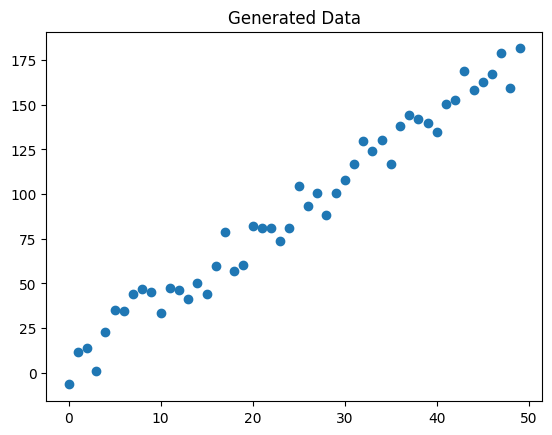

In [26]:
plt.title("Generated Data")
plt.scatter(x=df["X"], y=df["y"])
plt.show()

In [27]:
TRAIN_SIZE = 0.7
VAL_SIZE = 0.15
TEST_SIZE = 0.15


In [28]:
indices = list(range(NUM_SAMPLES))
np.random.shuffle(indices)
X = X[indices]
y = y[indices]


In [30]:
train_start = 0
train_end = int(0.7 * NUM_SAMPLES)
val_start = train_end
val_end = int((TRAIN_SIZE+VAL_SIZE) * NUM_SAMPLES)
test_start = val_end

In [31]:
X_train = X[train_start:train_end]
y_train = y[train_start:train_end]
X_val = X[val_start:val_end]
y_val = y[val_start:val_end]
X_test = X[test_start:]
y_test = y[test_start:]
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_val:{X_val.shape}, y_test: {y_val.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

X_train: (35, 1), y_train: (35, 1)
X_val:(7, 1), y_test: (7, 1)
X_test: (8, 1), y_test: (8, 1)


In [32]:
def standardize_data(data, mean, std):
    return (data - mean)/std

In [34]:
# Determine means and stds
X_mean = np.mean(X_train)
X_std = np.std(X_train)
y_mean = np.mean(y_train)
y_std = np.std(y_train)


In [35]:
# Standardize
X_train = standardize_data(X_train, X_mean, X_std)
y_train = standardize_data(y_train, y_mean, y_std)
X_val = standardize_data(X_val, X_mean, X_std)
y_val = standardize_data(y_val, y_mean, y_std)
X_test = standardize_data(X_test, X_mean, X_std)
y_test = standardize_data(y_test, y_mean, y_std)

In [36]:
print (f"mean: {np.mean(X_test, axis=0)[0]:.1f}, std: {np.std(X_test, axis=0)[0]:.1f}")
print (f"mean: {np.mean(y_test, axis=0)[0]:.1f}, std: {np.std(y_test, axis=0)[0]:.1f}")


mean: -0.9, std: 0.3
mean: -0.8, std: 0.3


In [39]:
INPUT_DIM = X_train.shape[1]
OUTPUT_DIM = y_train.shape[1]

In [42]:
W = 0.01 * np.random.randn(INPUT_DIM, OUTPUT_DIM)
b = np.zeros((1,1))
print(W,b)


[[-0.0027137]] [[0.]]


In [44]:
y_pred = np.dot(X_train, W) + b
print(y_pred)

[[ 0.00306988]
 [ 0.00233646]
 [-0.00133063]
 [-0.00261411]
 [-0.00169734]
 [-0.00188069]
 [-0.00389759]
 [ 0.00160304]
 [ 0.00013621]
 [-0.00078057]
 [-0.0022474 ]
 [ 0.00105298]
 [-0.00151398]
 [ 0.00417001]
 [ 0.00325323]
 [ 0.00435336]
 [-0.00114728]
 [ 0.00251982]
 [-0.00298082]
 [-0.00334753]
 [-0.00243076]
 [ 0.00086962]
 [-0.00408095]
 [ 0.00361994]
 [ 0.00050292]
 [ 0.00031956]
 [ 0.00453672]
 [ 0.0038033 ]
 [-0.00371424]
 [-0.00041386]
 [-0.00059721]
 [-0.00316418]
 [ 0.00472007]
 [-0.0002305 ]
 [-0.00279747]]


In [49]:
N = len(y_train)
loss = (1/(2*N)) * np.sum((y_pred - y_train)**2)
print(loss)

0.5026852793175739


In [50]:
dW = (2/(2*N)) * np.sum((y_pred - y_train) * X_train)
db = (2/(2*N)) * np.sum((y_pred - y_train) * 1)


In [51]:
LEARNING_RATE = 1e-1

In [52]:
W += -LEARNING_RATE * dW
b += -LEARNING_RATE * db

In [56]:
NUM_EPOCHS = 1000


In [57]:
# Initialize random weights
W = 0.01 * np.random.randn(INPUT_DIM, OUTPUT_DIM)
b = np.zeros((1, ))

# Training loop
for epoch_num in range(NUM_EPOCHS):

    # Forward pass [NX1] · [1X1] = [NX1]
    y_pred = np.dot(X_train, W) + b

    # Loss
    loss = (1/(len(y_train) * 2)) * np.sum((y_train - y_pred)**2)

    # Show progress
    if epoch_num%10 == 0:
        print (f"Epoch: {epoch_num}, loss: {loss:.3f}")

    # Backpropagation
    dW = (1/N) * np.sum((y_pred - y_train) * X_train)
    db = (1/N) * np.sum((y_pred - y_train) * 1)

    # Update weights
    W += -LEARNING_RATE * dW
    b += -LEARNING_RATE * db

Epoch: 0, loss: 0.481
Epoch: 10, loss: 0.069
Epoch: 20, loss: 0.019
Epoch: 30, loss: 0.013
Epoch: 40, loss: 0.012
Epoch: 50, loss: 0.012
Epoch: 60, loss: 0.012
Epoch: 70, loss: 0.012
Epoch: 80, loss: 0.012
Epoch: 90, loss: 0.012
Epoch: 100, loss: 0.012
Epoch: 110, loss: 0.012
Epoch: 120, loss: 0.012
Epoch: 130, loss: 0.012
Epoch: 140, loss: 0.012
Epoch: 150, loss: 0.012
Epoch: 160, loss: 0.012
Epoch: 170, loss: 0.012
Epoch: 180, loss: 0.012
Epoch: 190, loss: 0.012
Epoch: 200, loss: 0.012
Epoch: 210, loss: 0.012
Epoch: 220, loss: 0.012
Epoch: 230, loss: 0.012
Epoch: 240, loss: 0.012
Epoch: 250, loss: 0.012
Epoch: 260, loss: 0.012
Epoch: 270, loss: 0.012
Epoch: 280, loss: 0.012
Epoch: 290, loss: 0.012
Epoch: 300, loss: 0.012
Epoch: 310, loss: 0.012
Epoch: 320, loss: 0.012
Epoch: 330, loss: 0.012
Epoch: 340, loss: 0.012
Epoch: 350, loss: 0.012
Epoch: 360, loss: 0.012
Epoch: 370, loss: 0.012
Epoch: 380, loss: 0.012
Epoch: 390, loss: 0.012
Epoch: 400, loss: 0.012
Epoch: 410, loss: 0.012
Epo